<a href="https://colab.research.google.com/github/Deeppatel0510/Health_Insurance_Cross_Sell_Prediction/blob/main/Health_Insurance_Cross_Sell_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Health Insurance Cross Sell Prediction



#### Project Type - Classification
#### Contribution - Team
#### Team Member 1 - Gautam Patil
#### Team Member 2 - Deep Patel

# **Project** **Summary**

#### The project involves collecting customer data, such as gender, age, driving license status, vehicle information, and more. After preprocessing the data , performing the Exploratory Data Analysis and extracting relevant features, machine learning algorithms like logistic regression, decision tree, random forest, gradient boosting, and xgboost can be used to predict health insurance cross-selling. We can use GridSearchCv or RandomizedSearchCV for hyperparameter tuning; whereas HalvingRandomSearchCV method can be employed for hyperparameter tuning, striking a balance between computation time and model performance. The project's aim is to provide valuable insights to insurance companies, enabling them to target potential customers more effectively, allocate resources efficiently, and optimize their business strategies for the insurance market.

# **GitHub Link -**

https://github.com/Deeppatel0510?tab=repositories

# **Problem Statement**


Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Variables Description**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	: 0 = Customer does not have DL, 1 = Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 = Customer already has Vehicle Insurance, 0 = Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 : 1 = Customer got his/her vehicle damaged in the past. 0 = Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 = Customer is interested, 0 = Customer is not interested

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from imblearn.over_sampling import RandomOverSampler
from tabulate import tabulate

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Project Data/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')
ins_df = df.copy()

In [4]:
ins_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
ins_df.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


In [6]:
ins_df.shape

(381109, 12)

In [7]:
ins_df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [8]:
ins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


There are no null values in Dataset

#### Continuous Variables:
1. Age
2. Region_Code
3. Annual_Premium
4. Policy_Sales_Channel
5. Vintage

#### Categorical Variables:
1. Driving_License
2. Previously_Insured
3. Response
4. Gender
5. Vehicle_Age
6. Vehicle_Damage

In [9]:
ins_df.duplicated().sum()

0

In [10]:
ins_df.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

#### After performing some basic functions on dataset insights are as follows:

1. Age is continuous variable, it can be converted to categorical variable by assigning age groups.
2. Region Code and Policy Sales Channel can be converted to categorical variable by assigning them into groups like region A, B, C and Channel A, B, C.

## Exploratory Data Analysis

### Distribution of Response

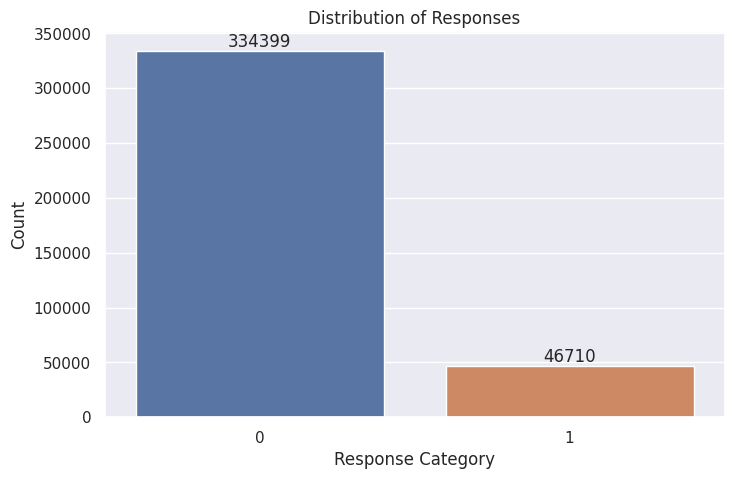

In [11]:
plt.figure(figsize = (8,5))

# Set the plot style for better visualization
sns.set_theme(style="darkgrid")

# Extract data from dataset
response_data = ins_df['Response']

# Create a countplot to visualize the distribution of the data
sns.countplot(x=response_data)

# Add labels and title to the plot
plt.xlabel('Response Category')
plt.ylabel('Count')
plt.title('Distribution of Responses')

# Add value counts on top of the bars for better insight
for index, value in enumerate(response_data.value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom')

###`Insights`
#### --> 87.74 % of customers are not interested in vehicle insurance
#### --> only 12.26 % of customers are interested in vehicle insurance
#### --> Dependent variable is quite imbalanced

### Correalation of Dataset

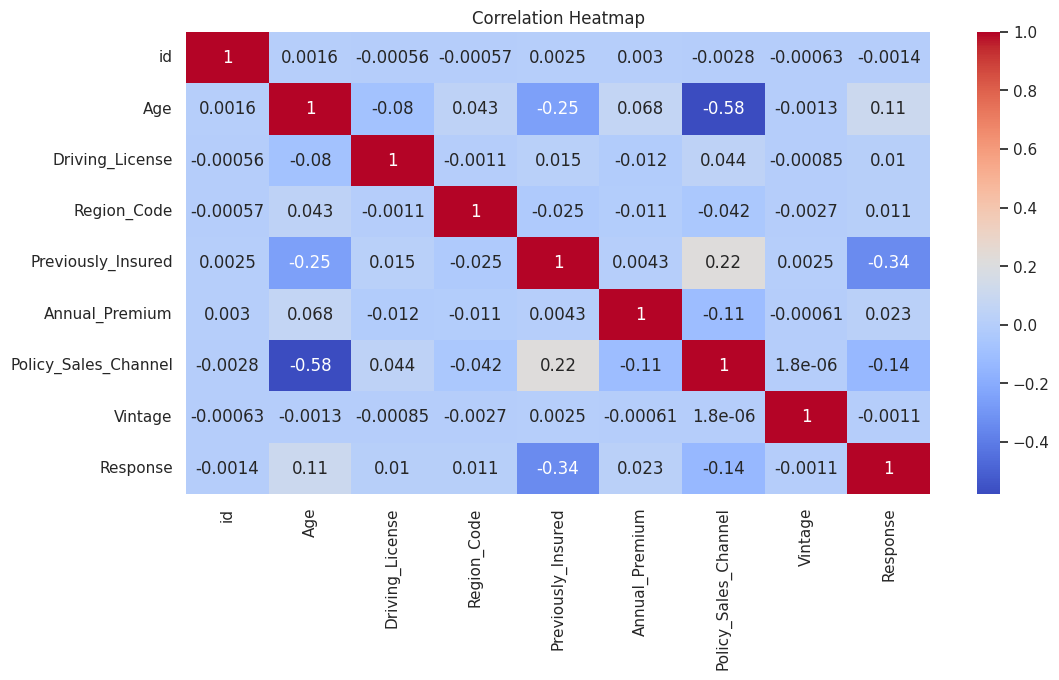

In [12]:
# Set the figure size for the heatmap
plt.figure(figsize=(12, 6))

# Create a heatmap to visualize the correlation matrix
correlation_matrix = ins_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Add a title and display the plot
plt.title('Correlation Heatmap')
plt.show()

### Distribution of Age column

#### Now we will begin with the Age column to gain some insights and relationships.

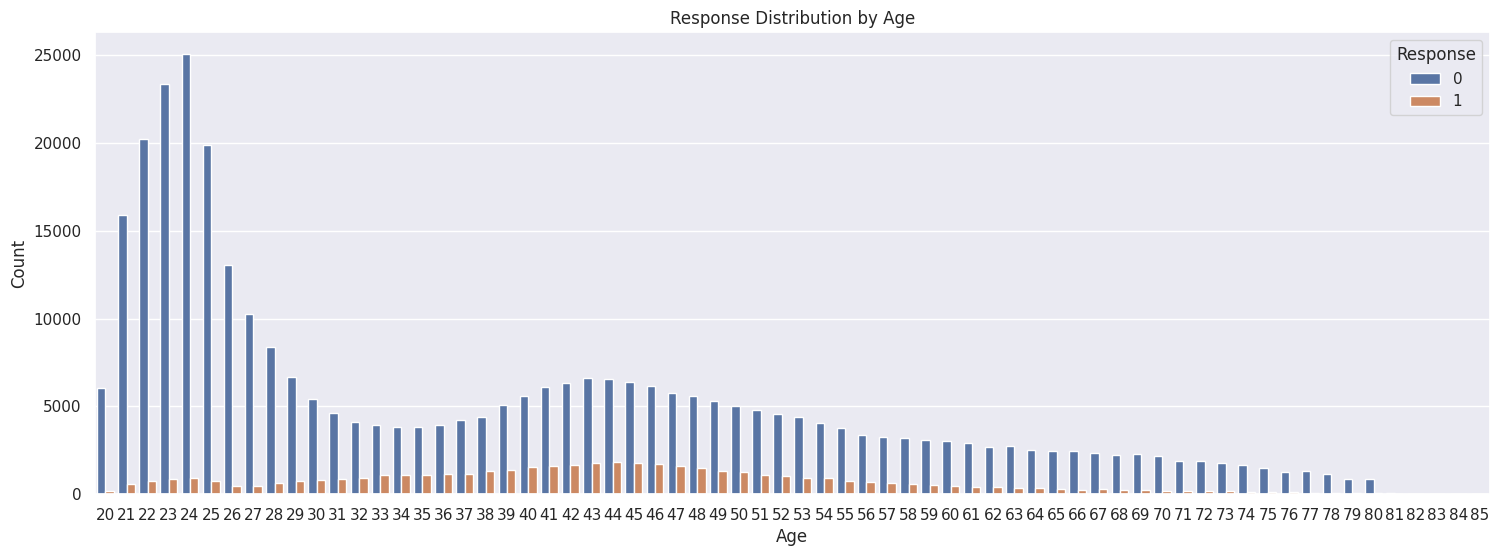

In [13]:
# Create a countplot to visualize the distribution of 'Response' based on 'Age'
plt.figure(figsize=(18, 6))
sns.countplot(x='Age', hue='Response', data=ins_df)

# Add labels and title to the plot
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Response Distribution by Age')
plt.show()

###`Insights`
#### --> Age range from 30 to around 50 have more number of responses than other age groups

### Make a pie chart for Previously_Insured.

In [14]:
ins_df['Previously_Insured'].value_counts()

0    206481
1    174628
Name: Previously_Insured, dtype: int64

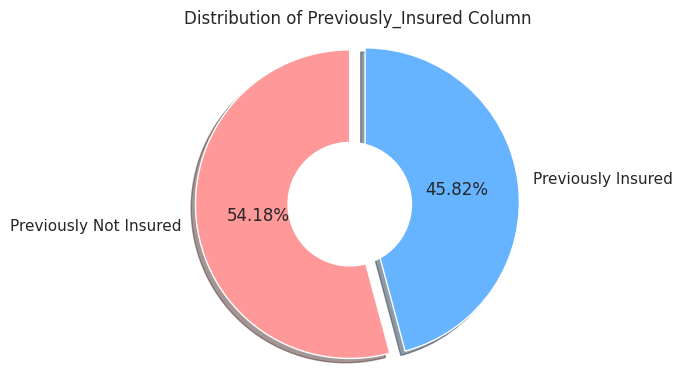

In [15]:
# Create the pie chart of Previously_Insured
plt.figure(figsize=(6, 4))
plt.pie(ins_df['Previously_Insured'].value_counts(), autopct='%.2f%%', labels= ["Previously Not Insured", "Previously Insured"], colors=['#ff9999', '#66b3ff'], shadow=True, startangle=90, explode=[0, 0.1])

# Add a title to the pie chart
plt.title('Distribution of Previously_Insured Column')

# Add a circle in the center to make it look like a donut chart
center_circle = plt.Circle((0, 0), 0.40, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Equal aspect ratio ensures that the pie chart is drawn as a circle
plt.axis('equal')

# Display the pie chart
plt.tight_layout()
plt.show()

###`Insights`

#### --> Half of the population (54.18%) is previously not insured, while 45.82% is previously insured.


### Making the age groups

Let's get the insights more accurately by making age groups

In [16]:
ins_df['Age_group'] = ins_df['Age'].apply(lambda x: 'Young Age(20-28)' if x < 29 else ('Middle Age(29-57)' if  29 < x <= 57 else 'Old Age(58-84)'))

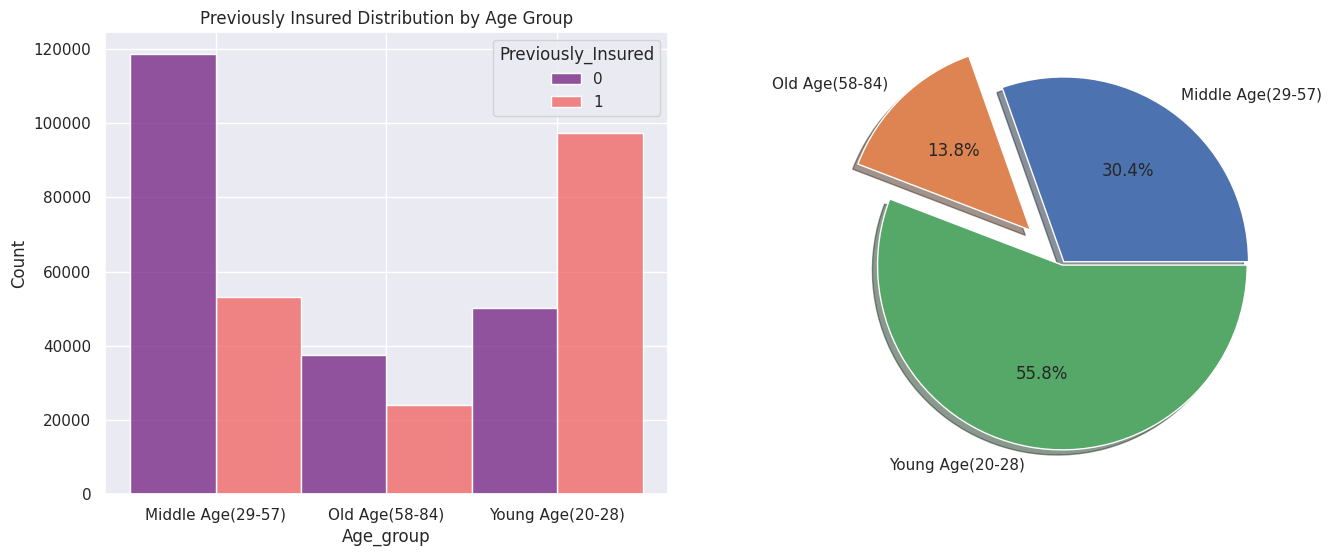

In [17]:
# First subplot - Previously Insured Distribution by Age Group
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
custom_palette = {0: 'green', 1: 'black'}
sns.histplot(x='Age_group', hue='Previously_Insured', data=ins_df, palette='magma', ax=ax1, multiple='dodge')
ax1.set_title('Previously Insured Distribution by Age Group')

# Second subplot - Pie chart for Previously Insured by Age Group
ax2.pie(x=ins_df.groupby('Age_group')['Previously_Insured'].sum(), explode=(0.01, 0.25, 0.01),
        labels=ins_df['Age_group'].unique(), autopct='%1.1f%%', shadow=True)

plt.show()

###`Insights`
#### --> With 55.8%, younger people are more likely to be insured than older people.
#### --> Middle and older age groups are previously insured at 30.4% and 13.8 percent, respectively.

### Age distribution and annual premium

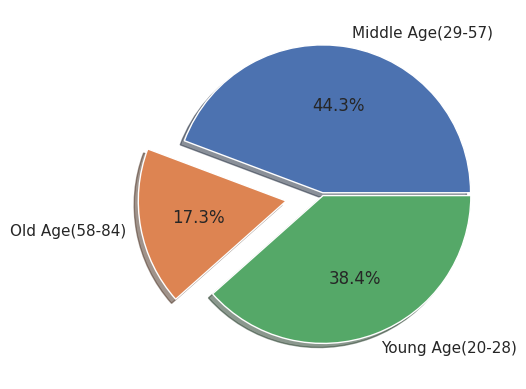

In [18]:
# Create a pie chart
plt.pie(x=ins_df.groupby('Age_group')['Annual_Premium'].sum(),explode=(0.01, 0.25, 0.01),
            labels=ins_df['Age_group'].unique(), autopct='%1.1f%%',
            shadow=True)

plt.show()

###`Insights`

#### --> The slice with the highest explosion represents the age group that contributes significantly more to the total Annual Premium.


### Vehicle_Damage distribution based upon Age_group

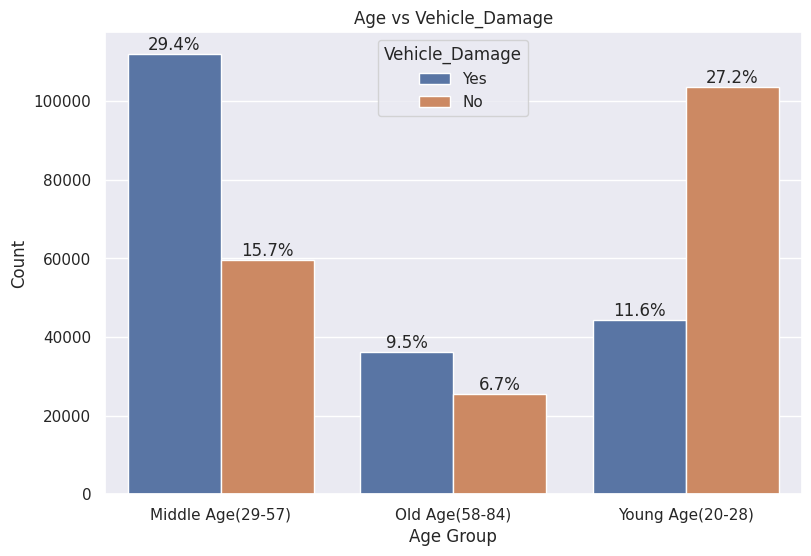

In [19]:
# Create a countplot to visualize the distribution of 'Vehicle_Damage' based on 'Age_group'
plt.figure(figsize=(9, 6))
ax = sns.countplot(x=ins_df['Age_group'], data=ins_df, hue='Vehicle_Damage')

# Calculate the total count for normalization
total = float(len(ins_df))

# Add percentage annotations on top of each bar
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

# Add labels and title to the plot
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age vs Vehicle_Damage')
plt.show()

###`Insights`
#### --> According to the chart, middle-aged persons have greater vehicle damage statistics, while young people have the fewest compared to middle age.




### Let's have a look at how they relate between Previously_Insured and Vehicle_Damage.

<Axes: xlabel='Previously_Insured', ylabel='count'>

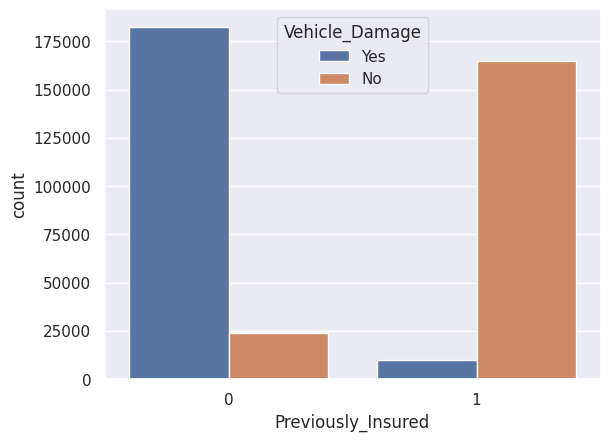

In [20]:
# Plot countplot of Previously_Insured and vehicle_Damage
sns.countplot(x = 'Previously_Insured', data = ins_df, hue = 'Vehicle_Damage')

###`Insights`
#### --> People who do not have prior insurance are more likely to have their vehicles damaged than those who do.


### Examine the age group, the number of times they had been insured, and their response and vehicle age

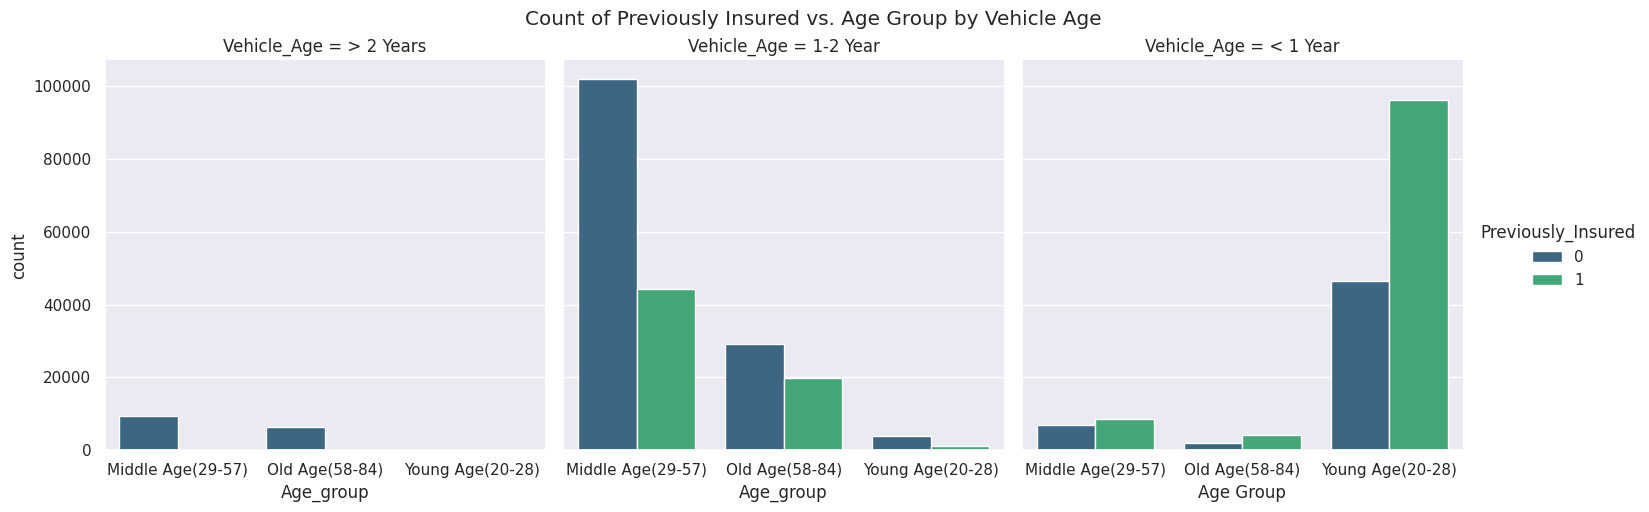

In [21]:
# Create a categorical plot using catplot
sns.catplot(x="Age_group", hue="Previously_Insured", col="Vehicle_Age", data=ins_df, kind="count", palette="viridis")

# Add title and labels to the plot
plt.suptitle('Count of Previously Insured vs. Age Group by Vehicle Age', y=1.02)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

###`Insights`
#### --> EDA reports that the majority of young adults (20-28) have new vehicle and have insurance.  

#### --> According to EDA, the majority of people in the (29-57) age group have vehicles that are between one and two years old, but they have not purchased any insurance for them.

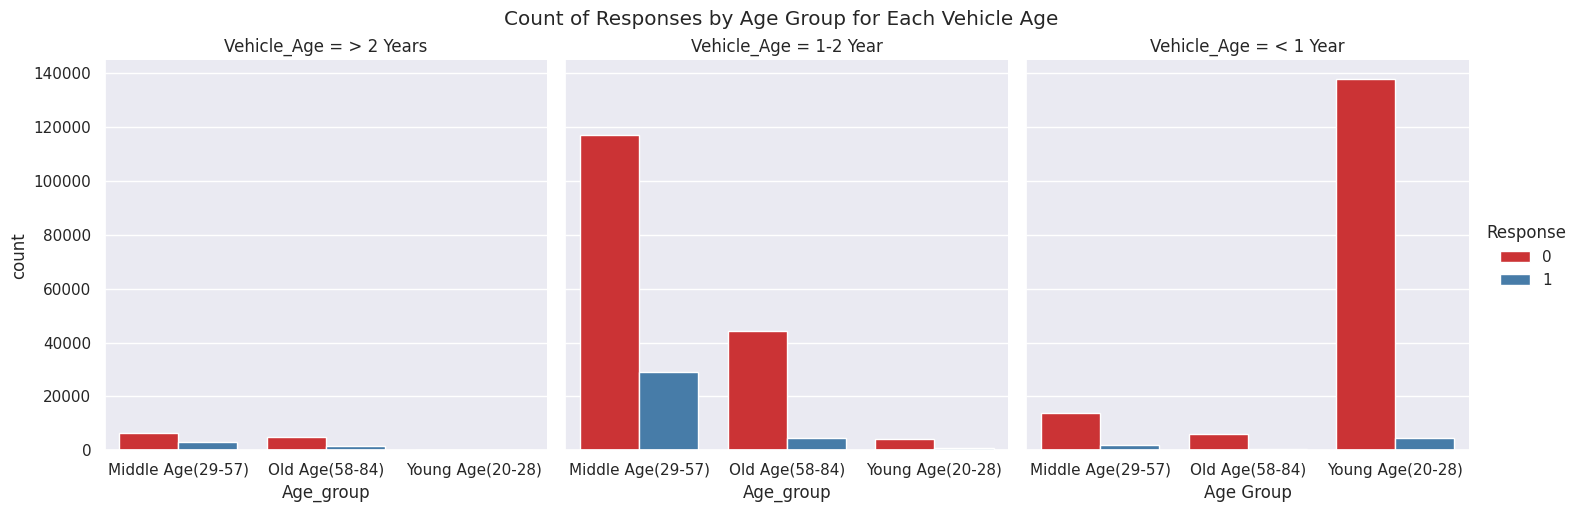

In [22]:
# Create a categorical plot using catplot
sns.catplot(x="Age_group", hue="Response", col="Vehicle_Age", data=ins_df, kind="count", palette="Set1")

# Add title and labels to the plot
plt.suptitle('Count of Responses by Age Group for Each Vehicle Age', y =1.02)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

###`Insights`
#### --> EDA claims that the young (20–28) age group has already purchased insurance, therefore they don't need to respond further.

#### --> The majority of persons in Middle age (29–57), according to EDA, are not interested in buying insurance.

#### Let's analyze the relationship between Policy_Sales_Channel and Age_group.

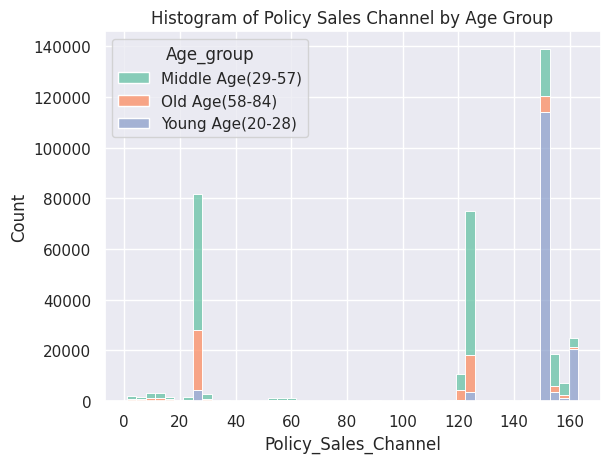

In [23]:
# Create a histogram plot with 'Policy_Sales_Channel' on the x-axis and 'Age_group' on the hue
sns.histplot(x="Policy_Sales_Channel", hue="Age_group", data=ins_df, multiple="stack", palette="Set2")

# Set the title of the plot
plt.title("Histogram of Policy Sales Channel by Age Group")
plt.show()

###`Insights`
#### --> The young age group has already purchased insurance, therefore the firm did not need to concentrate much more on the policy sales channel for this age group.

#### -->  They need to concentrate more on the Middle age group and expand the policy sales channel for individuals in this age group because they had a huge number of vehicle damage compare to young age and old age.

### Making categories in region columns to make it easier to examine

In [24]:
# categorizing 'Region_Code' values into 'Region A', 'Region B', or 'Region C' based on specified conditions using a lambda function.
ins_df['Region_code_cat'] = ins_df['Region_Code'].apply(lambda x: 'Region A' if x <= 16 else ('Region B' if 16 < x <= 32 else 'Region C'))

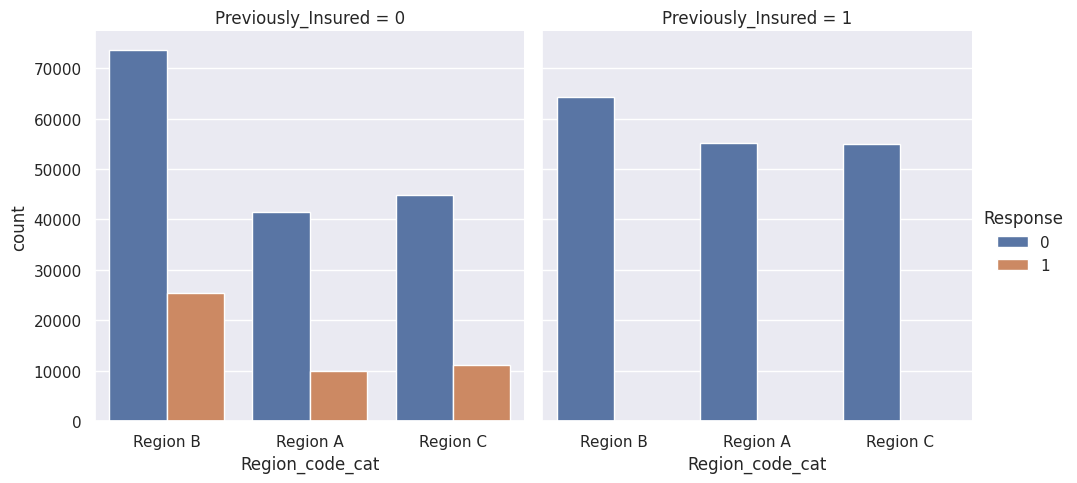

In [25]:
# Response Analysis by Region Code and Previous Insurance Status
sns.set(rc={'figure.figsize': (15, 5)})
sns.catplot(x = 'Region_code_cat', hue = 'Response', col = 'Previously_Insured', data = ins_df ,kind  = 'count')

In [26]:
ins_df[ins_df['Previously_Insured'] == 1]['Response'].sum()

158

###`Insights`
#### --> We may deduce that Region B, which has the highest count and has never been insured, has received more responses than other regions, while Region A has received the fewest.

#### --> Those who have previously been insured all have negative responses, with only 158 having positive responses. .


### Response Bar Plot by Vehicle Age and Vehicle Damage

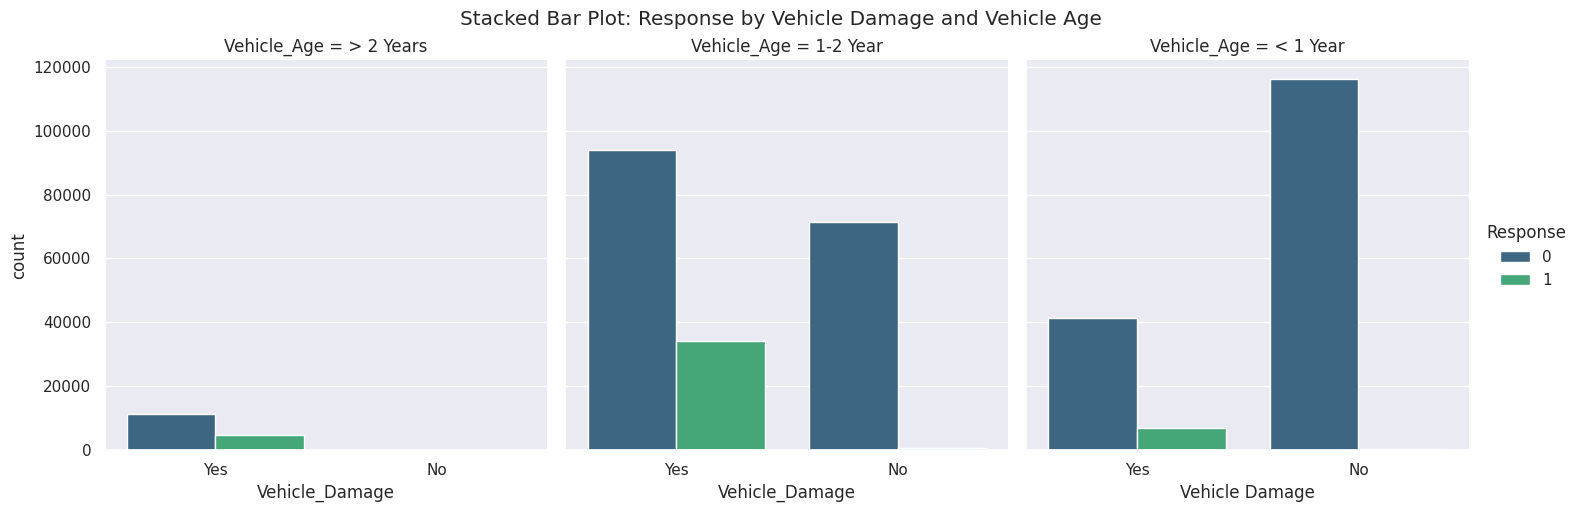

In [27]:
# Create the stacked bar plot using Seaborn's catplot
sns.catplot(x="Vehicle_Damage", hue="Response", col="Vehicle_Age", data=ins_df, kind="count", palette="viridis")

# Add labels and title
plt.xlabel("Vehicle Damage")
plt.ylabel("Count")
plt.suptitle("Stacked Bar Plot: Response by Vehicle Damage and Vehicle Age", y=1.02)
plt.show()

###`Insights`
#### --> According to the graph, middle-aged vehicles sustain more damage than older ones, which increases the need to get insurance.




### Distribution of the Annual Premium in a box plot

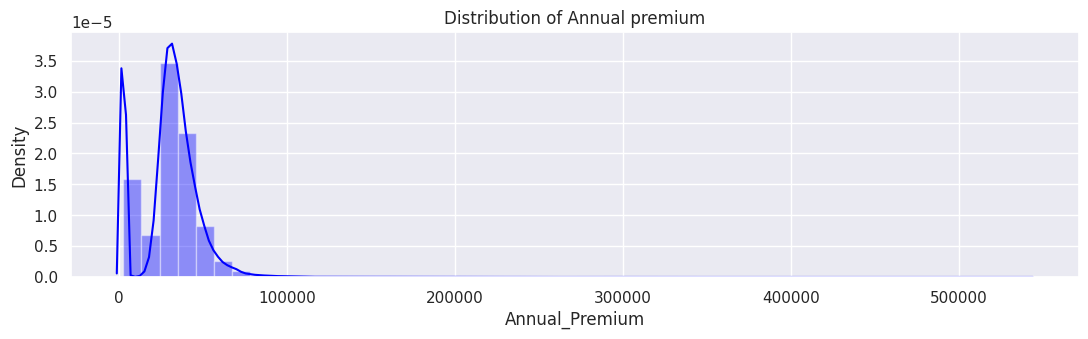

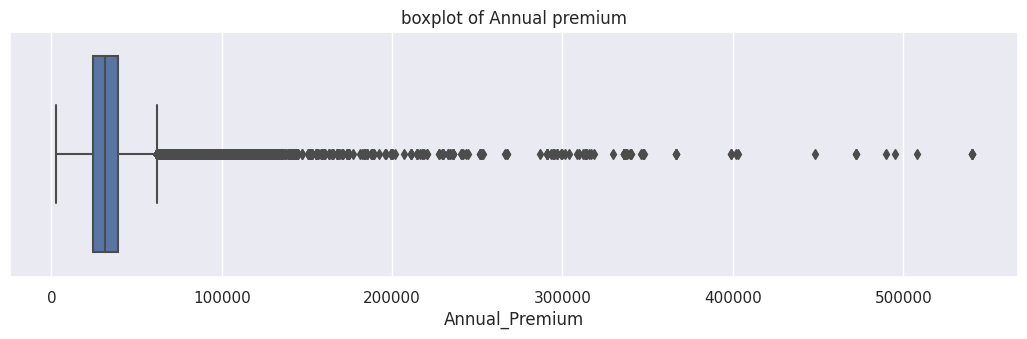

In [28]:
# Create the first subplot for the distribution plot
plt.figure(figsize=(13,7))
plt.subplot(2,1,1)

# Plot the distribution of "Annual_Premium"
sns.distplot(ins_df['Annual_Premium'], color='blue')
plt.title("Distribution of Annual premium")
plt.show()


# Create the second subplot for the box plot
plt.figure(figsize=(13,7))
plt.subplot(2,1,2)

# Plot the box plot for "Annual_Premium"
sns.boxplot(x= ins_df['Annual_Premium'])
plt.title("boxplot of Annual premium")
plt.show()

In [29]:
# drop Age_Group column from data set
ins_df.drop(['Age_group'], axis = 1, inplace = True)
ins_df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Region_code_cat
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,Region B
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,Region A
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,Region B
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,Region A
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,Region C
...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0,Region B
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0,Region C
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0,Region B
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0,Region A


#  Feature Selection

In [30]:
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

In [31]:
# Convert the columns from categorical (e.g., 'Male' and 'Female') to numerical labels (e.g., 0 and 1)
ins_df['Gender'] = label_encoder.fit_transform(ins_df['Gender'])
ins_df['Vehicle_Age'] = label_encoder.fit_transform(ins_df['Vehicle_Age'])
ins_df['Vehicle_Damage'] = label_encoder.fit_transform(ins_df['Vehicle_Damage'])

In [32]:
# Store Independent Variable
x = ins_df.drop(['Driving_License', 'id', 'Region_code_cat', 'Response'], axis = 1)

# Store Dependent variable
y = ins_df['Response']

In [33]:
# Random Oversampling for data
randomsample =  RandomOverSampler()
x,y = randomsample.fit_resample(x,y)

In [34]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [35]:
# Create an instance of StandardScaler
std_scaler = StandardScaler()

# Scale the training data
x_train = std_scaler.fit_transform(x_train)

# Scale the testing data using the fitted scaler
x_test = std_scaler.transform(x_test)

# Machine learning


### Functions

In [36]:
metrics_table_dict = {}
scores_names = ['Accuracy', 'Recall', 'F1', 'Precision','Roc_Auc_Score']
metrics_table_dict['Metrics'] = scores_names

In [37]:
def cv(model, tuning_method, params):
  if tuning_method == 'HalvingRandomSearchCV':
    tuning = HalvingRandomSearchCV(model, param_distributions = params, scoring = "f1", cv = 5 )
  elif tuning_method == 'GridSearchCV':
    tuning = GridSearchCV(model, param_grid = params, scoring = "f1", cv = 5 )
  elif tuning_method == 'RandomizedSearchCV':
    tuning = RandomizedSearchCV(model, param_distributions = params, scoring = "f1", cv = 5 )
  return tuning

In [38]:
def model_implementation(model, tuning_method, params, x_train, y_train, x_test):
    if params:
        tuned_model = cv(model, tuning_method, params)
        # Train the model using the training data
        tuned_model.fit(x_train, y_train)

        # Make predictions on the test data using the trained model
        y_test_pred = tuned_model.predict(x_test)
        y_test_proba = tuned_model.predict_proba(x_test)[:, 1]
        return y_test_pred, y_test_proba

    # Train the model using the training data
    model.fit(x_train, y_train)

    # Make predictions on the test data using the trained model
    y_test_pred = model.predict(x_test)
    y_test_proba = model.predict_proba(x_test)[:, 1]

    return y_test_pred, y_test_proba

In [39]:
def model_evaluation(model_name, y_test, y_test_pred):
  # Calculate evaluation metrics
  accuracy = accuracy_score(y_test, y_test_pred)
  recall = recall_score(y_test, y_test_pred)
  f1 = f1_score(y_test, y_test_pred)
  precision = precision_score(y_test, y_test_pred)
  roc_auc = roc_auc_score(y_test, y_test_pred)

  # Print the evaluation metrics in a tabular format
  print("Model Evaluation Metrics:")
  metrics_table = [
      ["Accuracy", accuracy],
      ["Recall", recall],
      ["F1 Score", f1],
      ["Precision", precision],
      ["Roc_Auc_Score", roc_auc]]

  metrics_table_dict[model_name] = [accuracy, recall, f1, precision,roc_auc]

  print(tabulate(metrics_table, headers=["Metric", "Score"], tablefmt="grid"))

In [40]:
def conf_mat(y_test, y_test_pred):
  # Calculate and print the confusion matrix of the model's predictions on the test data
  confusion_mat = confusion_matrix(y_test, y_test_pred)

  # Plot the confusion matrix as a heatmap using matplotlib
  print("Confusion Matrix:")
  print(tabulate(confusion_mat, tablefmt="grid"))

  plt.figure(figsize=(5, 8))
  fig, ax = plot_confusion_matrix(conf_mat=confusion_mat, figsize=(6, 6), cmap=plt.cm.Blues)
  plt.xlabel('Predictions', fontsize=18)
  plt.ylabel('Actuals', fontsize=18)
  plt.title('Confusion Matrix', fontsize=18)
  plt.show()

In [41]:
def plot_roc_auc(y_test, y_test_proba):
  if y_test.ndim > 1:
      y_test = y_test.ravel()

  roc_auc = roc_auc_score(y_test, y_test_proba)

  # Calculate the false positive rate (fpr) and true positive rate (tpr) for the ROC curve
  fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)

  # Plot the ROC curve using matplotlib
  plt.figure(figsize=(6, 6))
  plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve')
  plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.show()

In [42]:
def classif_report(y_test, y_test_pred):
  # Generate and print a classification report for the model's predictions on the test data
  classification_rep = classification_report(y_test, y_test_pred)

  # Print the classification report
  print("Classification Report:")
  print(classification_rep)

## Logistic Regression

In [43]:
y_test_pred, y_test_proba = model_implementation(LogisticRegression(), 'HalvingRandomSearchCV', {}, x_train, y_train, x_test)
model_evaluation("Logistic Regression" ,y_test, y_test_pred)

Model Evaluation Metrics:
+---------------+----------+
| Metric        |    Score |
+===============+==========+
| Accuracy      | 0.785586 |
+---------------+----------+
| Recall        | 0.976597 |
+---------------+----------+
| F1 Score      | 0.820084 |
+---------------+----------+
| Precision     | 0.706809 |
+---------------+----------+
| Roc_Auc_Score | 0.785442 |
+---------------+----------+


Confusion Matrix:
+-------+-------+
| 49645 | 33892 |
+-------+-------+
|  1958 | 81705 |
+-------+-------+


<Figure size 500x800 with 0 Axes>

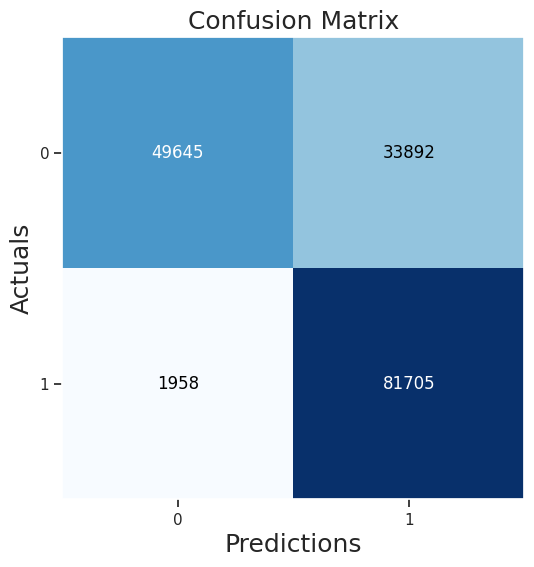

In [44]:
conf_mat(y_test, y_test_pred)

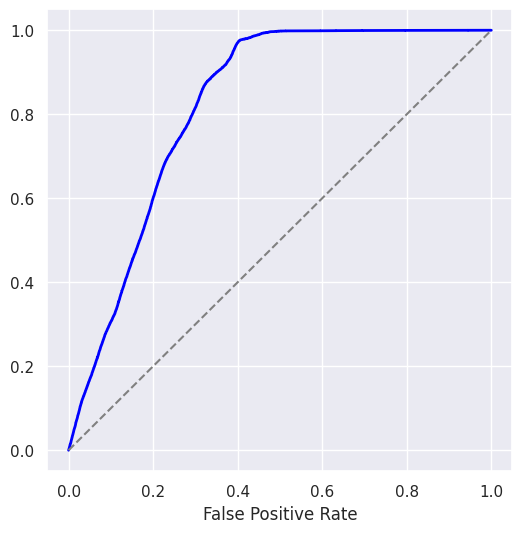

In [45]:
plot_roc_auc(y_test, y_test_proba)

In [46]:
classif_report(y_test, y_test_pred)

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.59      0.73     83537
           1       0.71      0.98      0.82     83663

    accuracy                           0.79    167200
   macro avg       0.83      0.79      0.78    167200
weighted avg       0.83      0.79      0.78    167200



## Decision Tree

In [47]:
params = {'max_depth': [20, 40, 60, 80, 100, 200], 'max_leaf_nodes': [20, 40, 60, 80, 100, 200]}
y_test_pred, y_test_proba = model_implementation(DecisionTreeClassifier(), 'HalvingRandomSearchCV', params, x_train, y_train, x_test)
model_evaluation("Decision Tree", y_test, y_test_pred)

Model Evaluation Metrics:
+---------------+----------+
| Metric        |    Score |
+===============+==========+
| Accuracy      | 0.795783 |
+---------------+----------+
| Recall        | 0.949643 |
+---------------+----------+
| F1 Score      | 0.823124 |
+---------------+----------+
| Precision     | 0.726354 |
+---------------+----------+
| Roc_Auc_Score | 0.795667 |
+---------------+----------+


Confusion Matrix:
+-------+-------+
| 53605 | 29932 |
+-------+-------+
|  4213 | 79450 |
+-------+-------+


<Figure size 500x800 with 0 Axes>

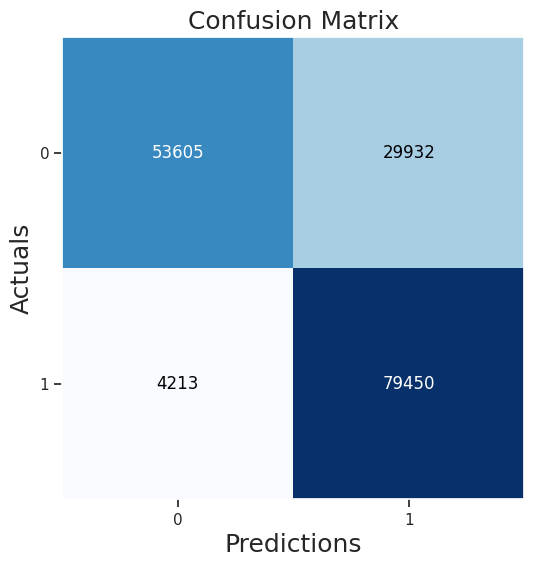

In [48]:
conf_mat(y_test, y_test_pred)

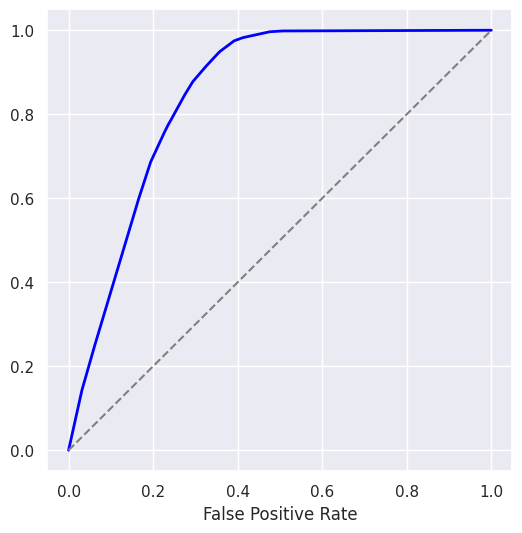

In [49]:
plot_roc_auc(y_test, y_test_proba)

In [50]:
classif_report(y_test, y_test_pred)

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.64      0.76     83537
           1       0.73      0.95      0.82     83663

    accuracy                           0.80    167200
   macro avg       0.83      0.80      0.79    167200
weighted avg       0.83      0.80      0.79    167200



## Random Forest

In [51]:
params = {'n_estimators' : [30,60,90], 'max_depth' : [100,60], 'max_leaf_nodes' : [120,60,30,20]}
y_test_pred, y_test_proba = model_implementation(RandomForestClassifier(), 'HalvingRandomSearchCV', params, x_train, y_train, x_test)
model_evaluation("Random Forest", y_test, y_test_pred)

Model Evaluation Metrics:
+---------------+----------+
| Metric        |    Score |
+===============+==========+
| Accuracy      | 0.795706 |
+---------------+----------+
| Recall        | 0.932264 |
+---------------+----------+
| F1 Score      | 0.820363 |
+---------------+----------+
| Precision     | 0.732446 |
+---------------+----------+
| Roc_Auc_Score | 0.795603 |
+---------------+----------+


Confusion Matrix:
+-------+-------+
| 55046 | 28491 |
+-------+-------+
|  5667 | 77996 |
+-------+-------+


<Figure size 500x800 with 0 Axes>

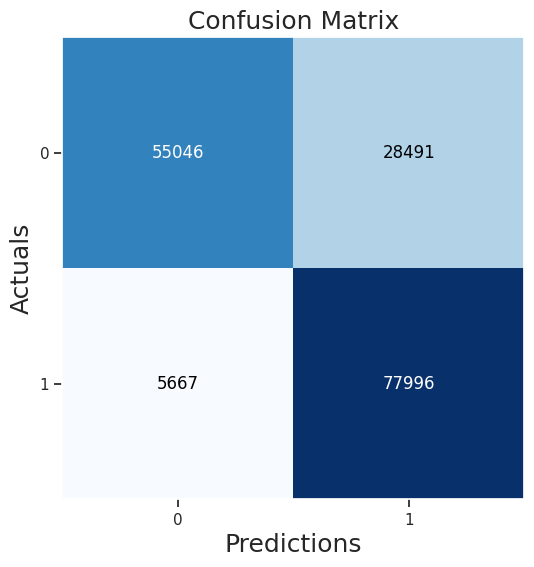

In [52]:
conf_mat(y_test, y_test_pred)

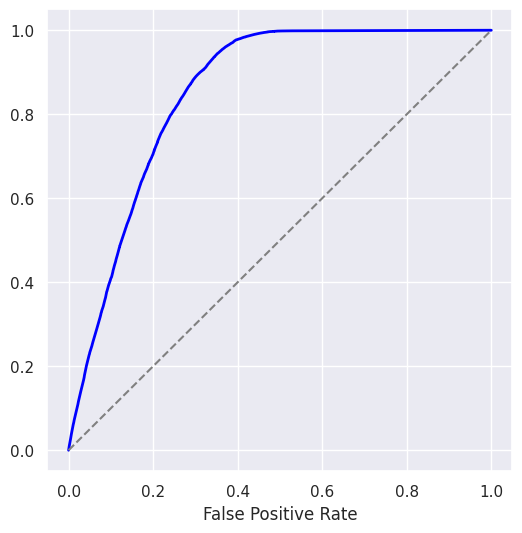

In [53]:
plot_roc_auc(y_test, y_test_proba)

In [54]:
classif_report(y_test, y_test_pred)

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.66      0.76     83537
           1       0.73      0.93      0.82     83663

    accuracy                           0.80    167200
   macro avg       0.82      0.80      0.79    167200
weighted avg       0.82      0.80      0.79    167200



## K-nearest neighbor Classifier

In [55]:
params = {'n_neighbors' : [5,15,20]}
y_test_pred, y_test_proba = model_implementation(KNeighborsClassifier(), 'HalvingRandomSearchCV', params, x_train, y_train, x_test)
model_evaluation("K-nearest neighbor Classifier", y_test, y_test_pred)

Model Evaluation Metrics:
+---------------+----------+
| Metric        |    Score |
+===============+==========+
| Accuracy      | 0.861441 |
+---------------+----------+
| Recall        | 0.970764 |
+---------------+----------+
| F1 Score      | 0.875178 |
+---------------+----------+
| Precision     | 0.796729 |
+---------------+----------+
| Roc_Auc_Score | 0.861359 |
+---------------+----------+


Confusion Matrix:
+-------+-------+
| 62816 | 20721 |
+-------+-------+
|  2446 | 81217 |
+-------+-------+


<Figure size 500x800 with 0 Axes>

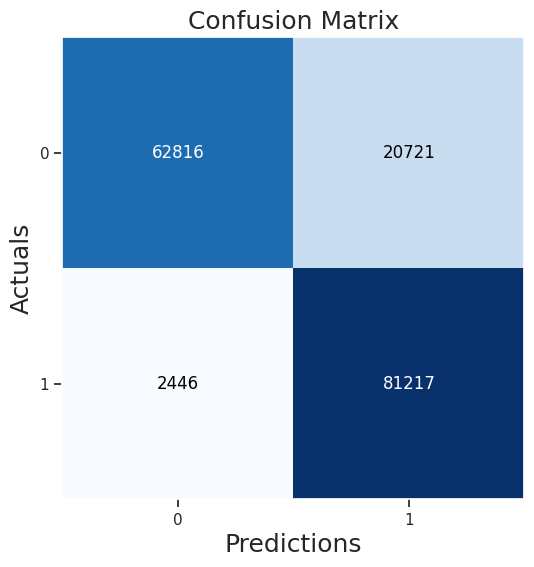

In [56]:
conf_mat(y_test, y_test_pred)

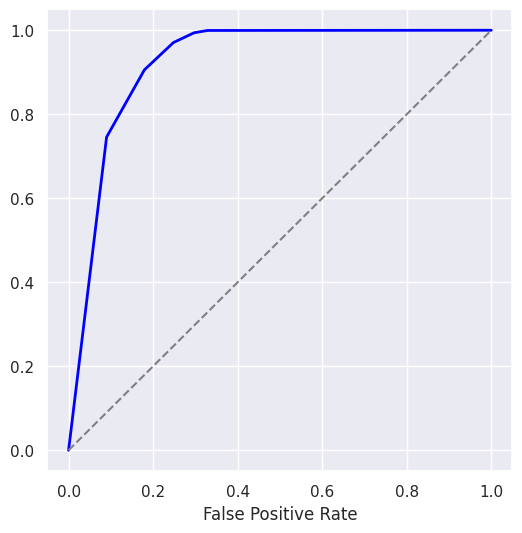

In [57]:
plot_roc_auc(y_test, y_test_proba)

In [58]:
classif_report(y_test, y_test_pred)

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.75      0.84     83537
           1       0.80      0.97      0.88     83663

    accuracy                           0.86    167200
   macro avg       0.88      0.86      0.86    167200
weighted avg       0.88      0.86      0.86    167200



## Gradient Boosting

In [59]:
params = {'n_estimators' : [30,60,90], 'max_depth' : [100,60], 'max_leaf_nodes' : [120,60,30,20]}
y_test_pred, y_test_proba = model_implementation(GradientBoostingClassifier(), 'HalvingRandomSearchCV', params, x_train, y_train, x_test)
model_evaluation("Gradient Boosting", y_test, y_test_pred)

Model Evaluation Metrics:
+---------------+----------+
| Metric        |    Score |
+===============+==========+
| Accuracy      | 0.802853 |
+---------------+----------+
| Recall        | 0.929718 |
+---------------+----------+
| F1 Score      | 0.825157 |
+---------------+----------+
| Precision     | 0.741737 |
+---------------+----------+
| Roc_Auc_Score | 0.802757 |
+---------------+----------+


Confusion Matrix:
+-------+-------+
| 56454 | 27083 |
+-------+-------+
|  5880 | 77783 |
+-------+-------+


<Figure size 500x800 with 0 Axes>

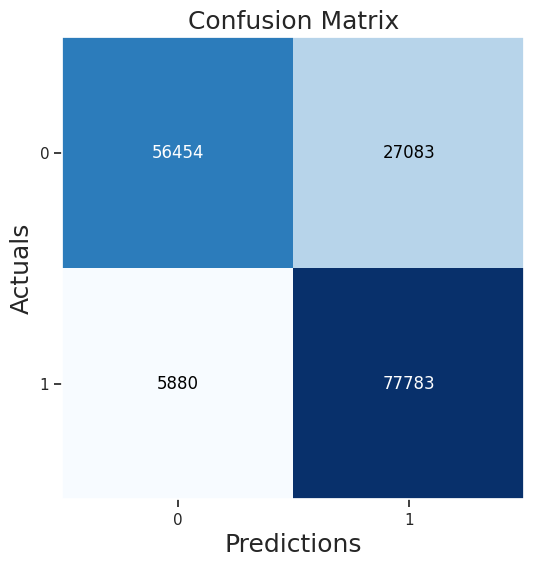

In [60]:
conf_mat(y_test, y_test_pred)

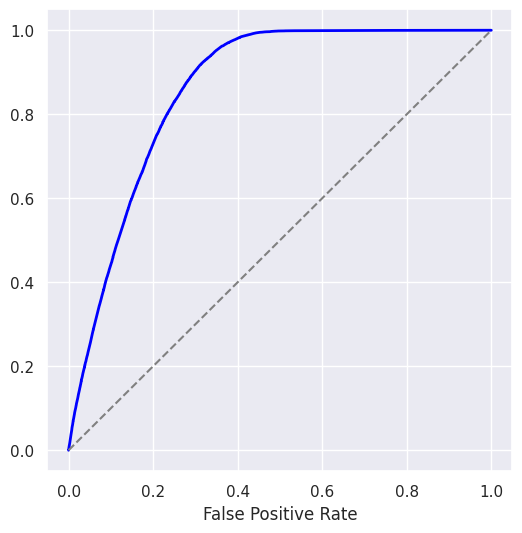

In [61]:
plot_roc_auc(y_test, y_test_proba)

In [62]:
classif_report(y_test, y_test_pred)

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.68      0.77     83537
           1       0.74      0.93      0.83     83663

    accuracy                           0.80    167200
   macro avg       0.82      0.80      0.80    167200
weighted avg       0.82      0.80      0.80    167200



## XGBClassifier

In [63]:
params = {'n_estimators' : [30,60,90], 'max_depth' : [100,60]}
y_test_pred, y_test_proba = model_implementation(XGBClassifier(), 'HalvingRandomSearchCV', params, x_train, y_train, x_test)
model_evaluation("XGB Classifier", y_test, y_test_pred)

Model Evaluation Metrics:
+---------------+----------+
| Metric        |    Score |
+===============+==========+
| Accuracy      | 0.942356 |
+---------------+----------+
| Recall        | 0.997287 |
+---------------+----------+
| F1 Score      | 0.945397 |
+---------------+----------+
| Precision     | 0.89864  |
+---------------+----------+
| Roc_Auc_Score | 0.942315 |
+---------------+----------+


Confusion Matrix:
+-------+-------+
| 74126 |  9411 |
+-------+-------+
|   227 | 83436 |
+-------+-------+


<Figure size 500x800 with 0 Axes>

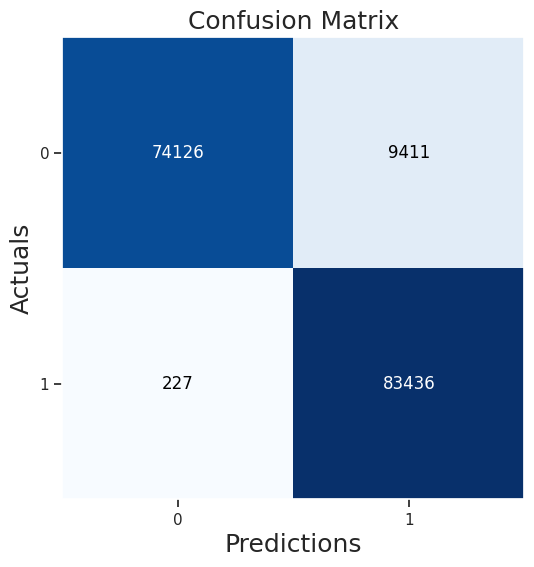

In [64]:
conf_mat(y_test, y_test_pred)

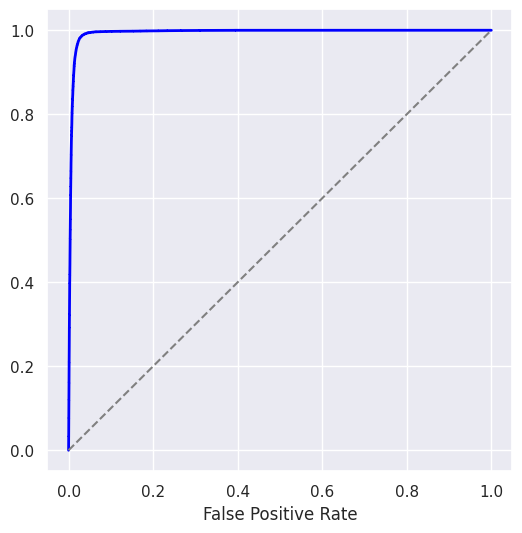

In [65]:
plot_roc_auc(y_test, y_test_proba)

In [66]:
classif_report(y_test, y_test_pred)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94     83537
           1       0.90      1.00      0.95     83663

    accuracy                           0.94    167200
   macro avg       0.95      0.94      0.94    167200
weighted avg       0.95      0.94      0.94    167200



In [67]:
#Tabulate

print(tabulate(metrics_table_dict, headers = metrics_table_dict.keys(), tablefmt='pipe'))

| Metrics       |   Logistic Regression |   Decision Tree |   Random Forest |   K-nearest neighbor Classifier |   Gradient Boosting |   XGB Classifier |
|:--------------|----------------------:|----------------:|----------------:|--------------------------------:|--------------------:|-----------------:|
| Accuracy      |              0.785586 |        0.795783 |        0.795706 |                        0.861441 |            0.802853 |         0.942356 |
| Recall        |              0.976597 |        0.949643 |        0.932264 |                        0.970764 |            0.929718 |         0.997287 |
| F1            |              0.820084 |        0.823124 |        0.820363 |                        0.875178 |            0.825157 |         0.945397 |
| Precision     |              0.706809 |        0.726354 |        0.732446 |                        0.796729 |            0.741737 |         0.89864  |
| Roc_Auc_Score |              0.785442 |        0.795667 |        0.795603 |     

# Conclusion

--> According to the EDA, just 46710 of our 381109 consumers are interested in purchasing a vehicle insurance policy, which means that the firm must put in a lot of effort to increase sales of their vehicle insurance.



--> The Middle Age Group (29-57) members are more likely to be interested in buying vehicle insurance, hence this middle age group is where the majority of the company's target customers come from.



--> Those who have not prior insurance have a very high vehicle damage count, while those who have prior insurance have a very low vehicle damage count. For this reason, the firm focuses more on individuals who have vehicle damage but no insurance.



--> The majority of vehicle damage occurs in the middle age bracket (29-57) and is followed by the younger age bracket (20-28), which increases the likelihood that customers in these age brackets will get vehicle insurance.



--> The majority of individuals who own new vehicles already have insurance, whereas the majority of people who own vehicles that are between one and two years old do not. For this reason, the firm focused on customers whose vehicles were at least that old.



--> Through EDA, we discovered that the firm can more focus on  Region B as it have less count of previously insured people, leading the corporation to put more agents in this area.



--> we found that customers between the ages of 20 and 28 have more prior insurance.Those who are older and those in the middle age range (ages 29 to 57) had lower insurance coverage, correspondingly.



--> For identifying if a buyer would be interested in vehicle insurance or not, we used machine learning algorithms. Therefore, we used models, such as gradient boosting, decision tree, kNN, random forest, and xgboost classifiers. Overall, the XGboost Classifier model achieved 93% accuracy, making it the best model for this issue.